In [1]:
import os, sys, json
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from collections import defaultdict
from tabulate import tabulate
from IPython.core.display import display, HTML

# Increase display width
display(HTML("<style>.container { width:80% !important; }</style>"))

# Some styling
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 10

In [22]:
# We reuse these over and over and it's easier to have them in a list than unordered dict
model_names = ["wgan", "wgpgan", "nsgan", "mmgan", "ragan", 
               "lsgan", "dragan", "began", "infogan", "fishergan", 
               "fgan_forward_kl", "fgan_reverse_kl", "fgan_jensen_shannon",
               "fgan_total_var", "fgan_hellinger", "fgan_pearson"]
distance_metrics=["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance"]#, "Energy-Distance"]
distributions=['normal', 'beta', 'gumbel', 'laplace', 'exponential', 'gamma']

# Colors
palette = ["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", "#98df8a", "#d62728", "#ff9896", "#9467bd",
            "#c5b0d5", "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", "#c7c7c7", "#bcbd22" "#dbdb8d",
            "#17becf", "#9edae5"]

# For subplotting
plt_idx = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

    
def graph_multivariate(optimal, 
                       omit_outliers=True,
                       thresh=8.5,
                       plt_idx=plt_idx,
                       model_names=model_names,
                       distance_metrics=distance_metrics,
                       distributions=distributions,
                       palette=palette):
    
    for metric in distance_metrics:

        fig, axes = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(20,20))

        for d_idx, distribution in enumerate(distributions):

            for idx, model_name in enumerate(model_names):

                if model_name in ['vae', 'autoencoder']:
                    continue
                    
                data = optimal[model_name][distribution][metric]['mean']
                
                if omit_outliers:
                    # Remove outliers
                    data = np.array(data)
                    notnan_indexes = ~np.isnan(data)
                    no_outliers = data.flatten()[~is_outlier(data[notnan_indexes], thresh=thresh)]

                    axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].plot(np.linspace(1, data.shape[0]+1, no_outliers.shape[0]),
                                                                     no_outliers,
                                                                     label=model_name,
                                                                     c=palette[idx])
                    
                else:

                    axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].plot(range(1, len(data)+1),
                                                                     data,
                                                                     c=palette[idx],
                                                                     label=model_name)
                
                axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].set_title("{0}".format(distribution.capitalize()))
            
            
        fig.suptitle("{0}".format(metric), fontsize=22)
        fig.text(0.5, 0.04, "Epoch", ha='center', fontsize=18)
        plt.legend(loc='center left', bbox_to_anchor=(1, 1), fontsize=18)
        plt.show()
#         plt.savefig('../graphs/multivariate/{0}_{1}_{2}.png'.format(metric, dims, samples), dpi=100)


def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh


def nested_pickle_dict():
    """ Picklable defaultdict nested dictionaries """
    return defaultdict(nested_pickle_dict)


def mean_confidence_interval(data, axis=1, confidence=0.95):
    try:
        n = data.shape[axis]
    except IndexError:
        axis = 0
        n = data.shape[axis]

    mu, std = np.nanmean(data, axis=axis), scipy.stats.sem(data, axis=axis, nan_policy='omit')
    h = np.ma.getdata(std) * scipy.stats.t.ppf((1 + confidence) / 2., n-1)       

    return mu, h, mu-h, mu+h


def load_best(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
        
    return data

In [16]:
optimal_1000 = load_best('/Users/sob/Desktop/gan_results/best_hyper/multivariate/128_dims_1000_samples/data.json')
optimal_10000 = load_best('/Users/sob/Desktop/gan_results/best_hyper/multivariate/128_dims_10000_samples/data.json')
optimal_100000 = load_best('/Users/sob/Desktop/gan_results/best_hyper/multivariate/128_dims_100000_samples/data.json')

In [34]:
# bug with saving..
optimal_1000['mmgan']['beta']['KL-Divergence']['values']

[[1.6343402290235955,
  1.4633447325649436,
  1.5550427860713087,
  1.5786231357966893,
  1.4334040288421577,
  1.6889720415960454,
  1.5394137945178588,
  1.7516568098408967,
  1.5444177247903768,
  1.7830610394509945,
  1.519782256228106,
  1.3137833355913164,
  1.3165937119577928,
  1.306170628552306,
  1.3029526160809433,
  1.3894969607518348,
  1.3486173080792105,
  1.278138008961767,
  1.4705715170564697,
  1.3519901098650031,
  1.3767429894297116,
  1.3942930149637545,
  1.5690440259392788,
  1.254468344876217,
  1.1961038704859723],
 [1.9070858363743897,
  2.189847402123679,
  2.116237360274499,
  2.1155813569427306,
  2.8655270531370105,
  2.7781300563353577,
  2.1493009826644363,
  2.0427936915134346,
  2.0910936519453345,
  3.258189660562646,
  2.9470037514864345,
  2.5983251876454023,
  2.623231126872338,
  2.5088434913749786,
  2.3960422331662623,
  1.7570436882556186,
  2.2718961434904084,
  1.3800289174565155,
  2.452458315992349,
  2.4256954057065476,
  2.05076038076606

In [35]:
optimal_10000['mmgan']['beta']['KL-Divergence']['values']

[[1.6343402290235955,
  1.4633447325649436,
  1.5550427860713087,
  1.5786231357966893,
  1.4334040288421577,
  1.6889720415960454,
  1.5394137945178588,
  1.7516568098408967,
  1.5444177247903768,
  1.7830610394509945,
  1.519782256228106,
  1.3137833355913164,
  1.3165937119577928,
  1.306170628552306,
  1.3029526160809433,
  1.3894969607518348,
  1.3486173080792105,
  1.278138008961767,
  1.4705715170564697,
  1.3519901098650031,
  1.3767429894297116,
  1.3942930149637545,
  1.5690440259392788,
  1.254468344876217,
  1.1961038704859723],
 [1.9070858363743897,
  2.189847402123679,
  2.116237360274499,
  2.1155813569427306,
  2.8655270531370105,
  2.7781300563353577,
  2.1493009826644363,
  2.0427936915134346,
  2.0910936519453345,
  3.258189660562646,
  2.9470037514864345,
  2.5983251876454023,
  2.623231126872338,
  2.5088434913749786,
  2.3960422331662623,
  1.7570436882556186,
  2.2718961434904084,
  1.3800289174565155,
  2.452458315992349,
  2.4256954057065476,
  2.05076038076606

 Plot mean performance across epochs for 1k samples


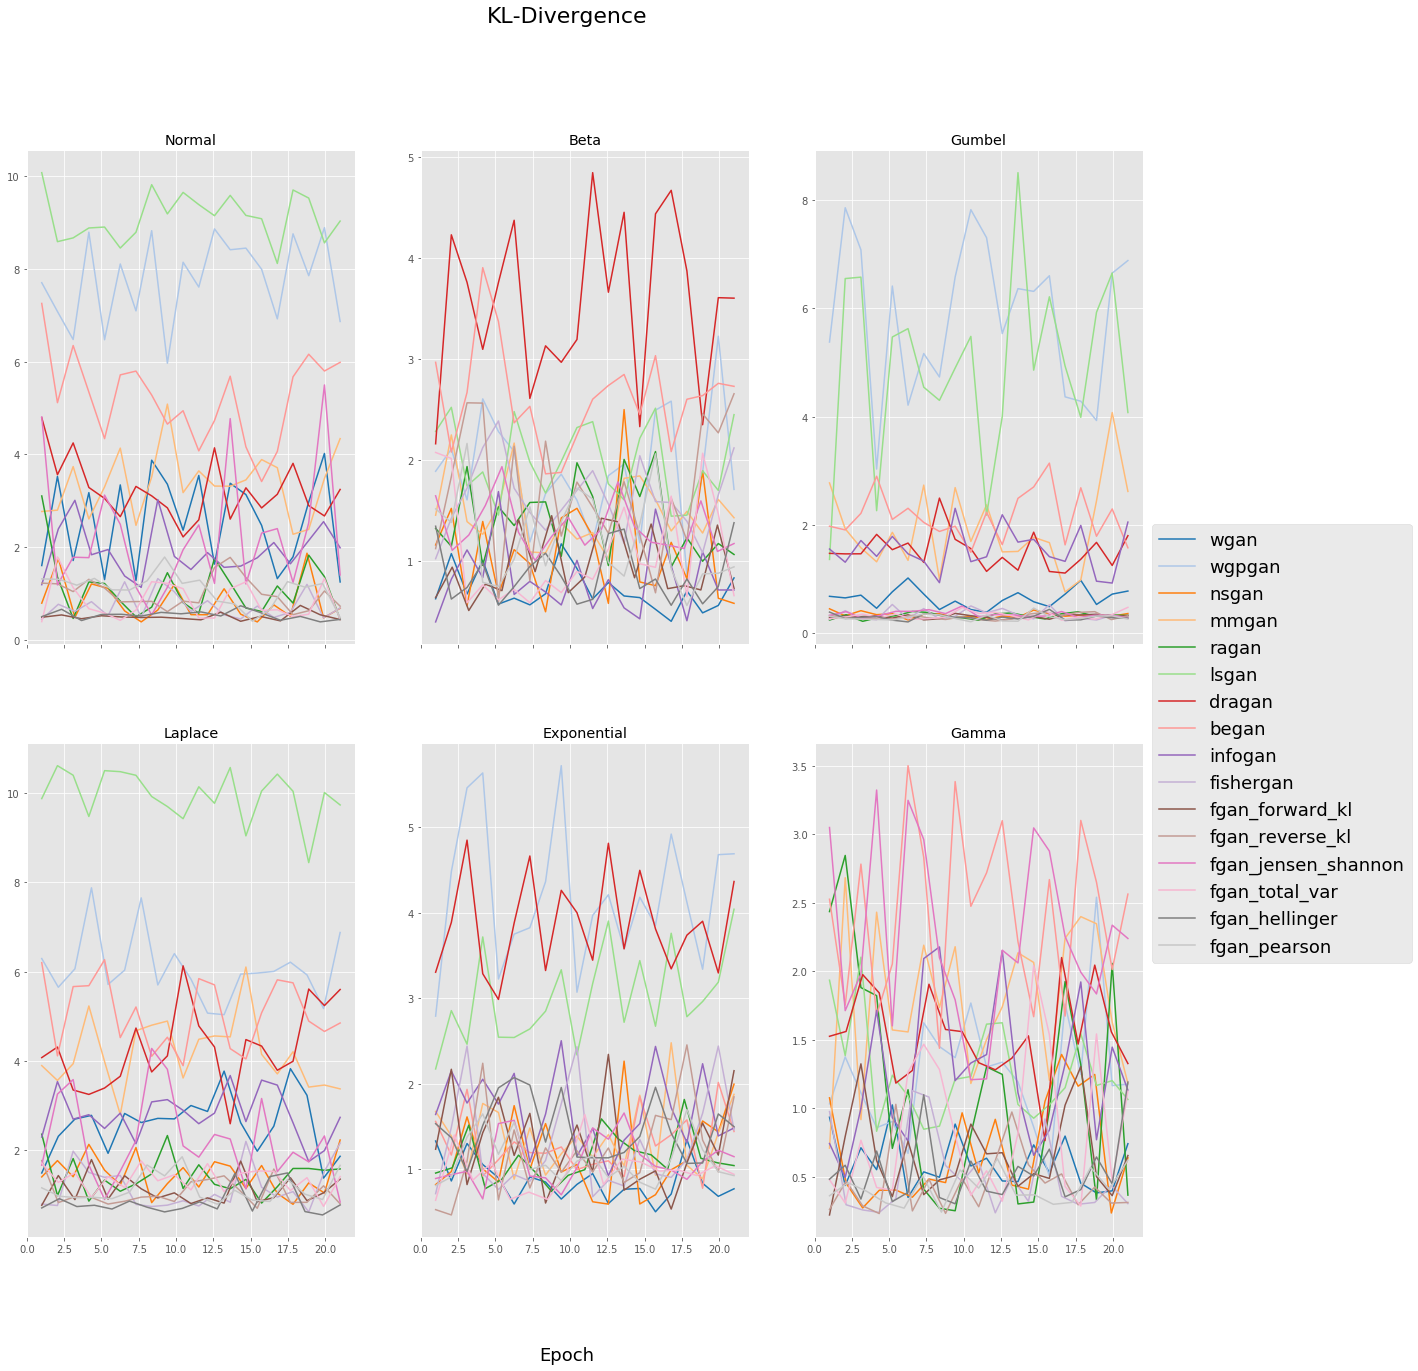

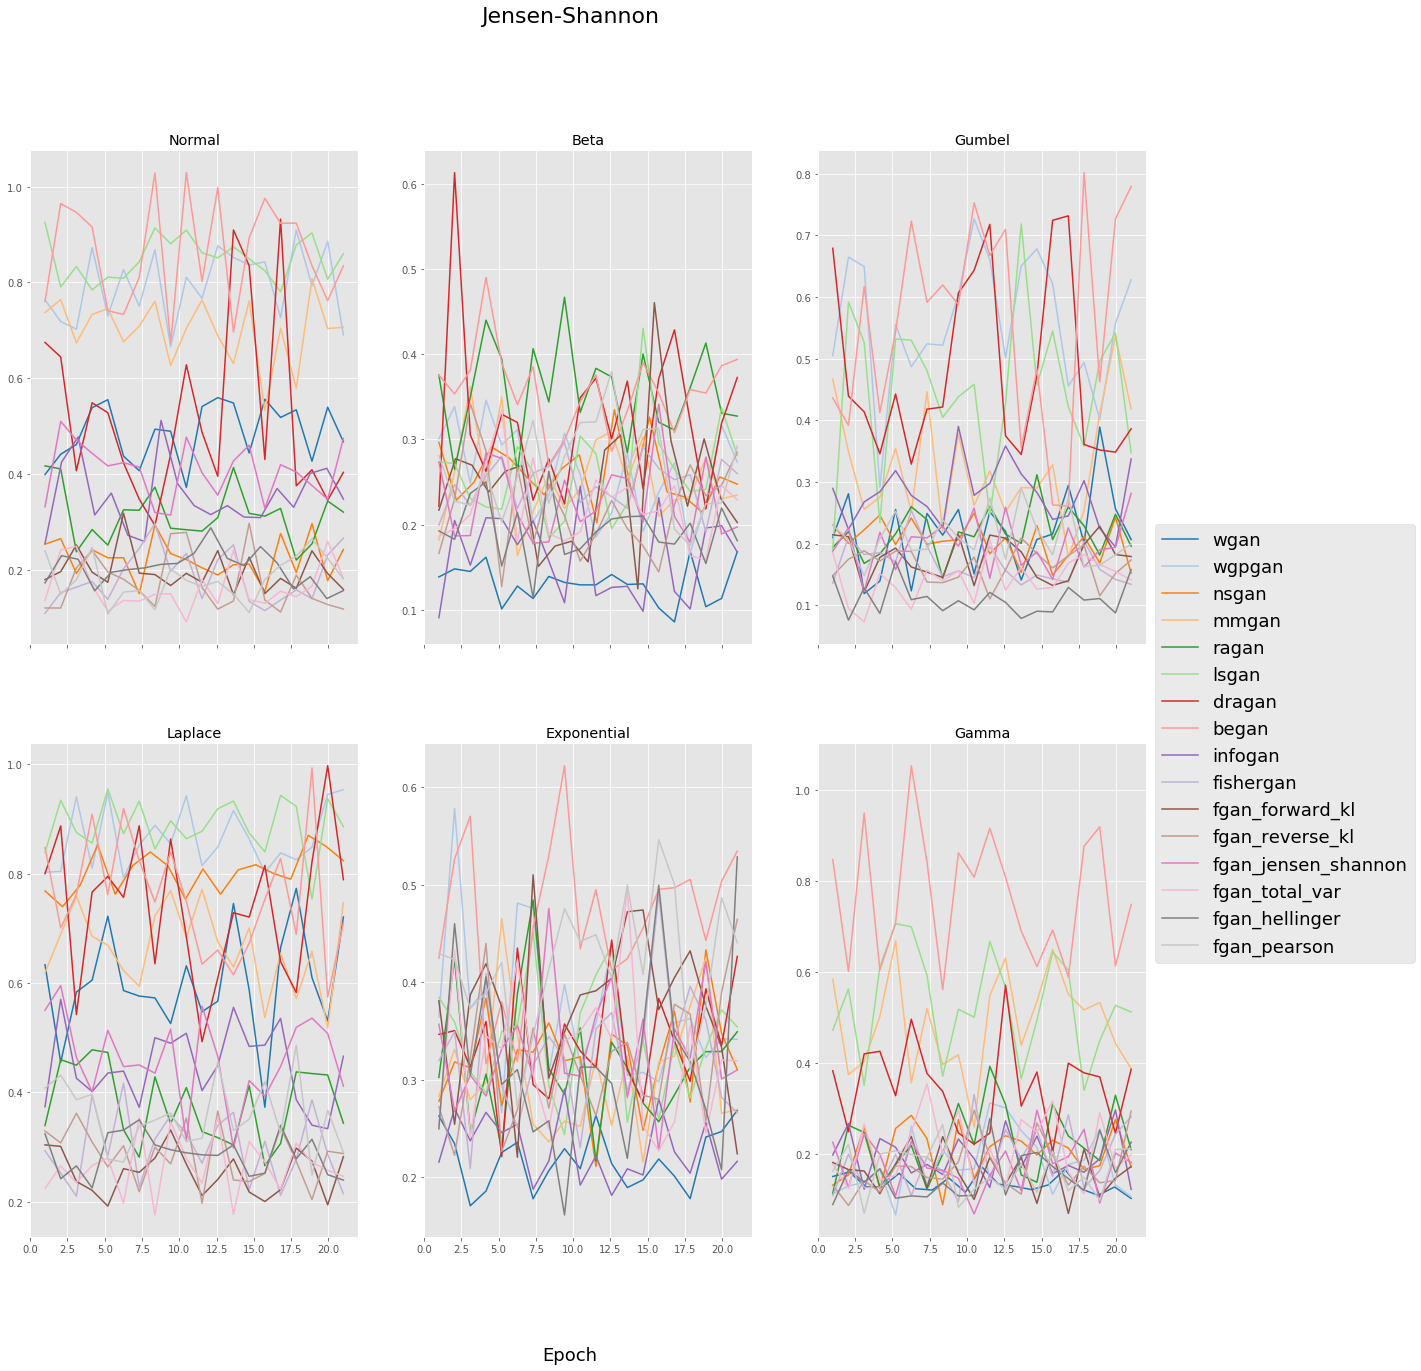

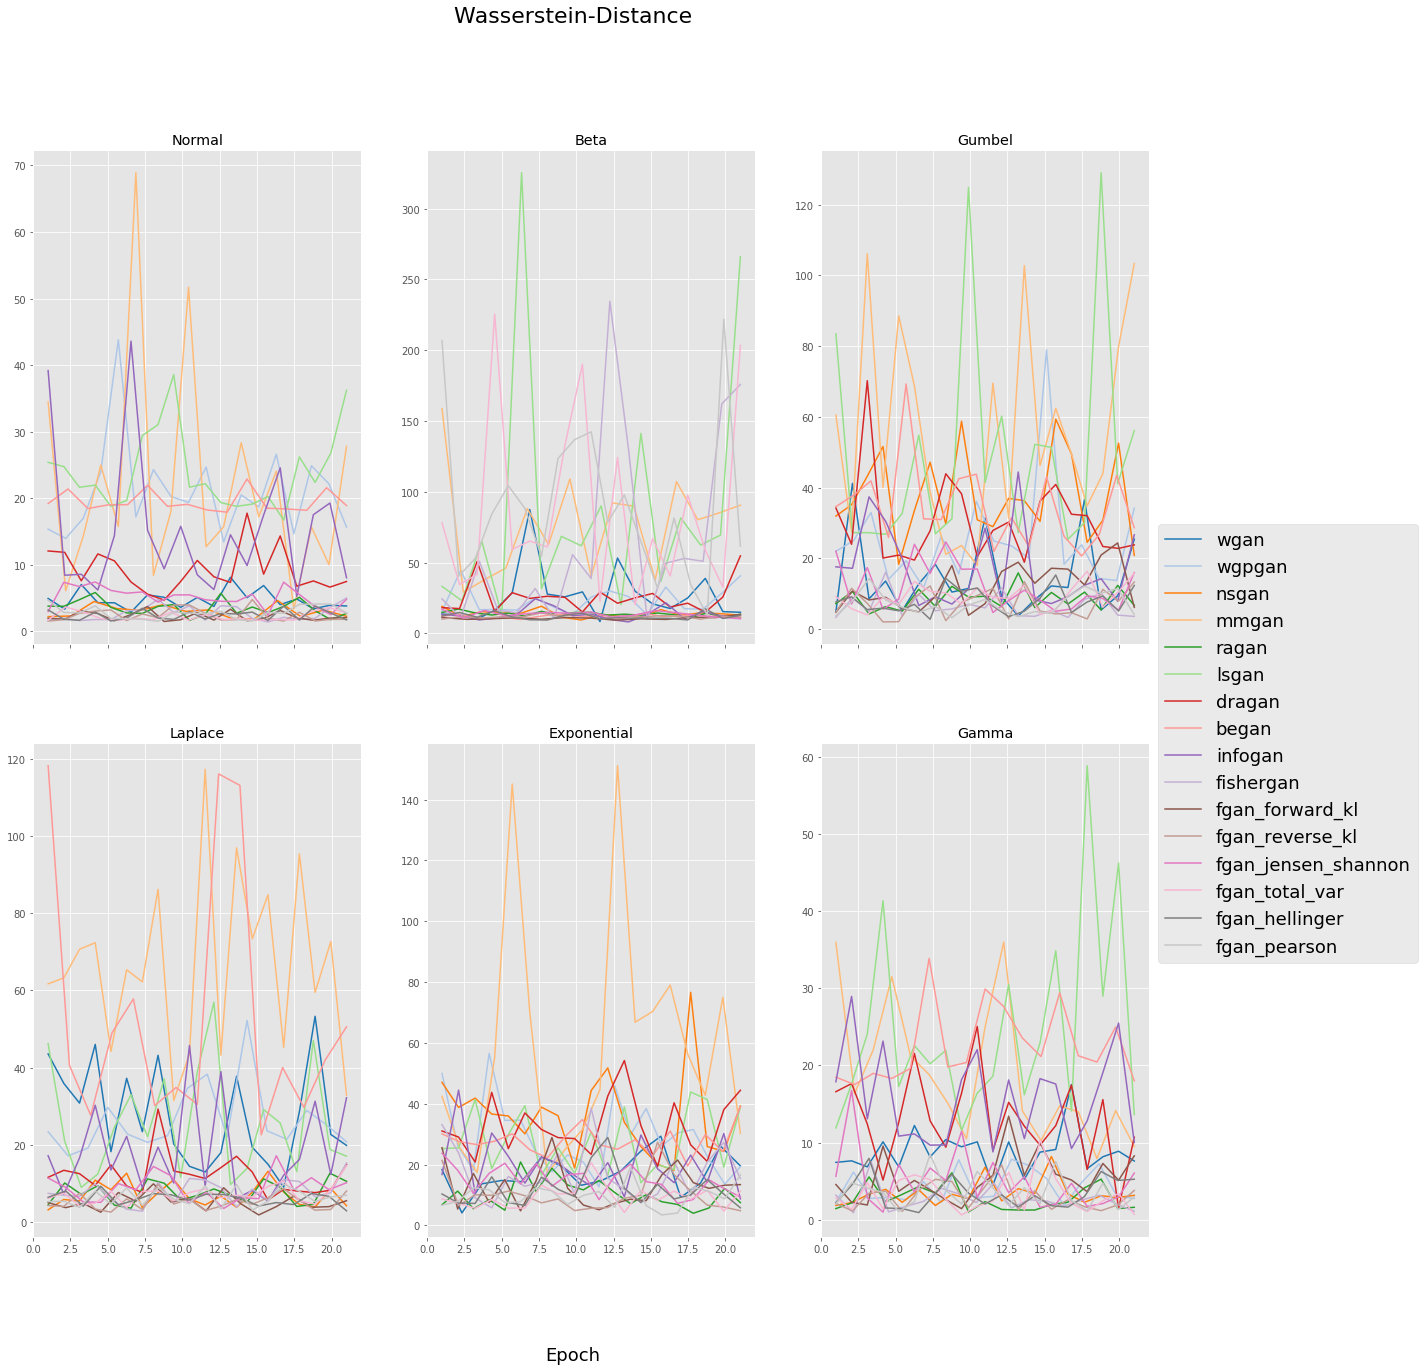

In [23]:
print(""" Plot mean performance across epochs for 1k samples""")
graph_multivariate(optimal_1000, omit_outliers=True, thresh=4.5)

 Plot mean performance across epochs for 10k samples


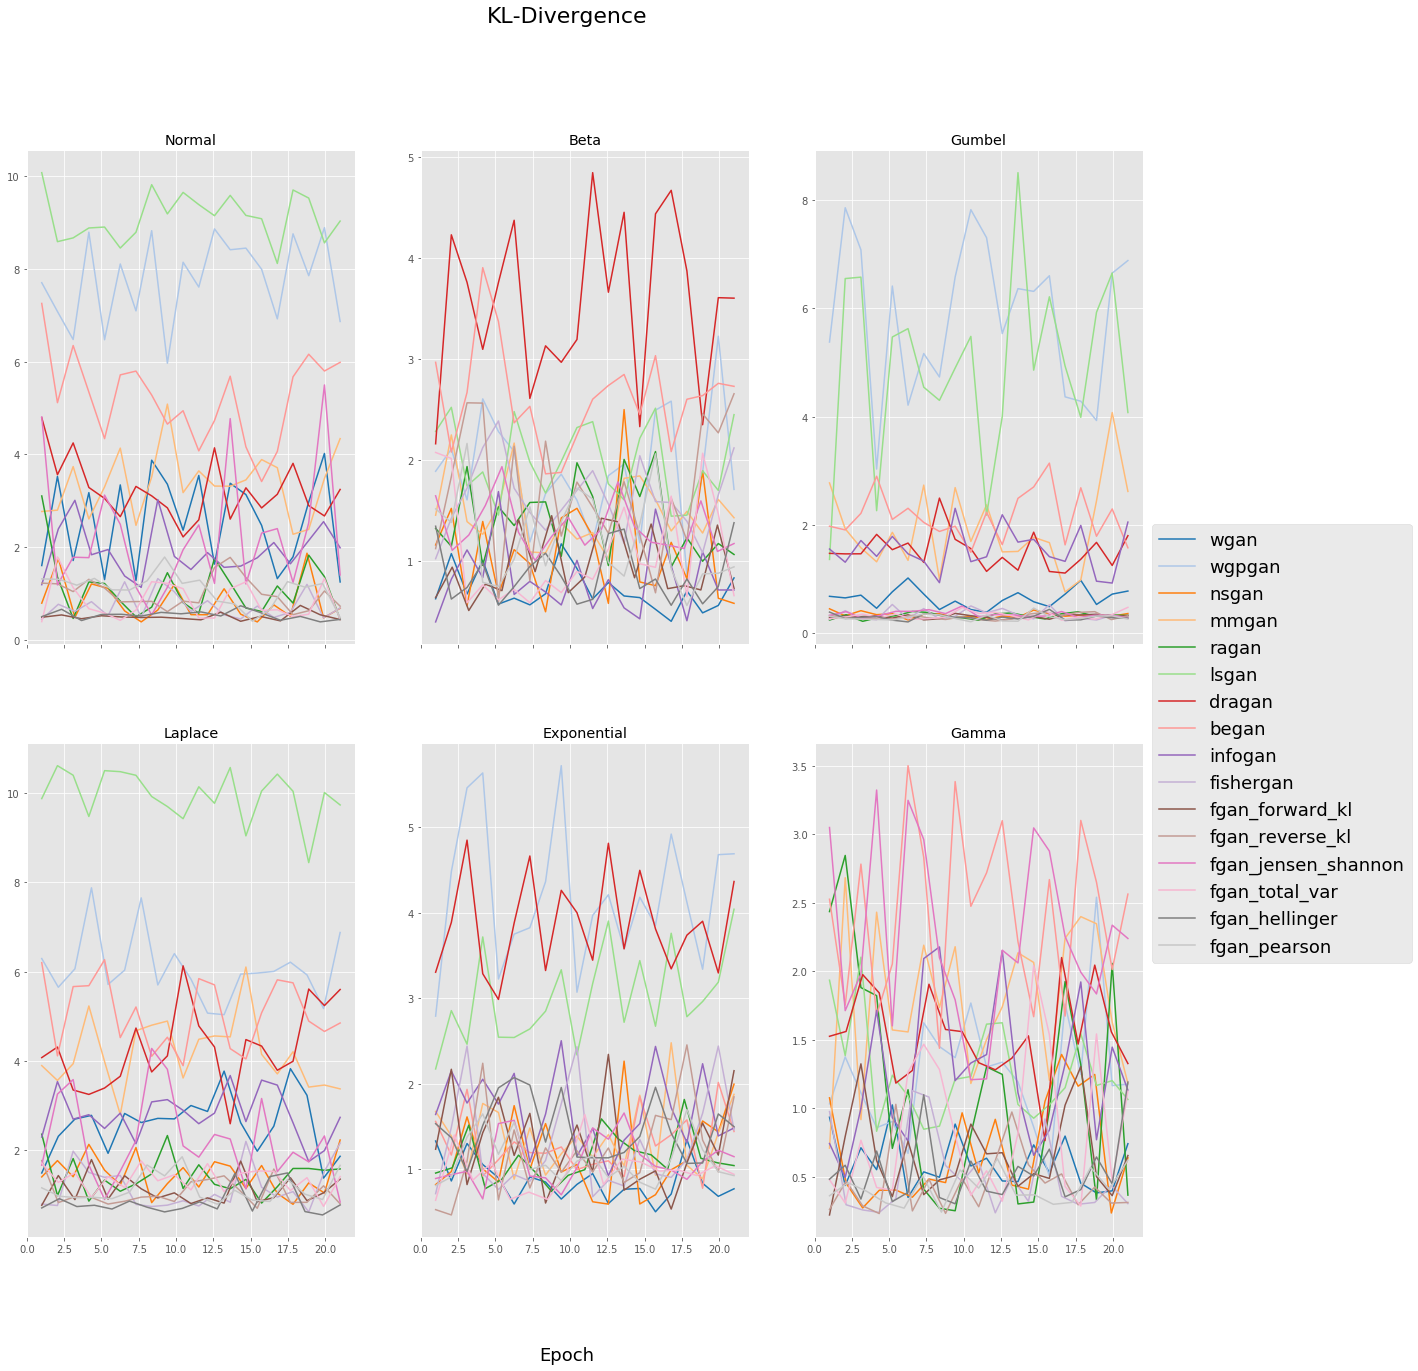

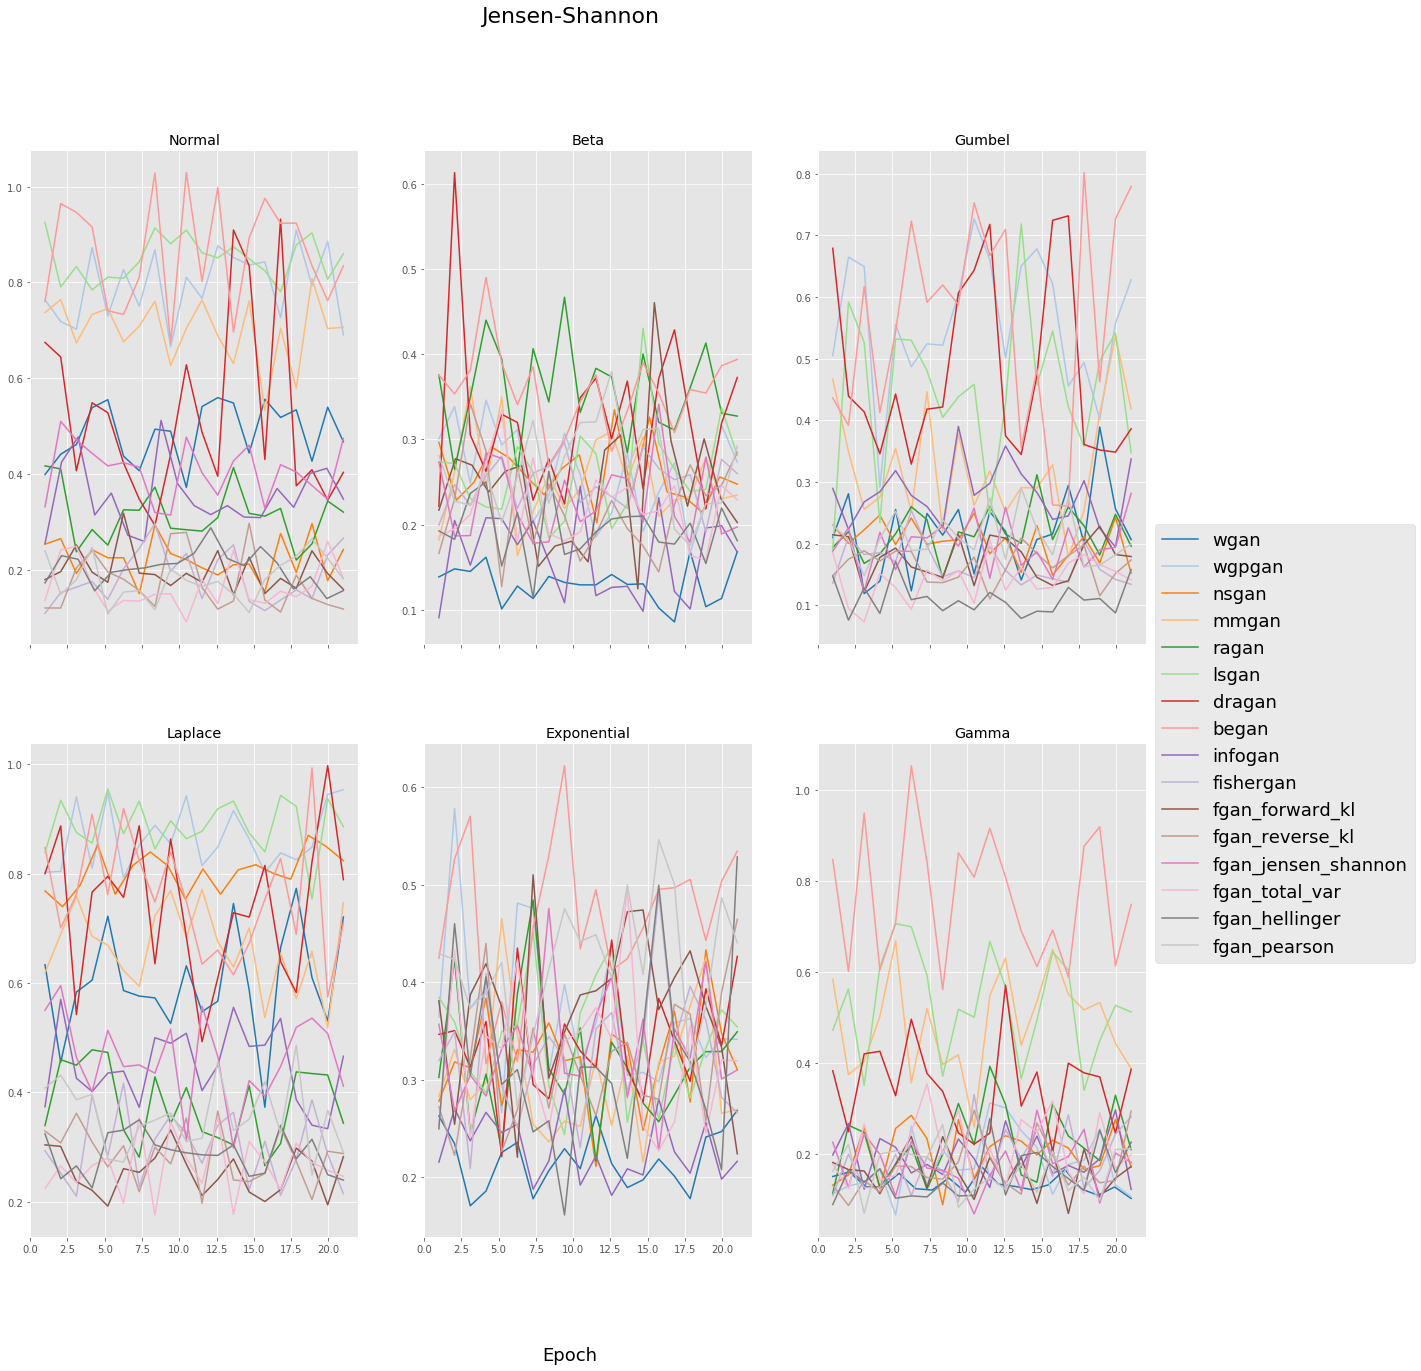

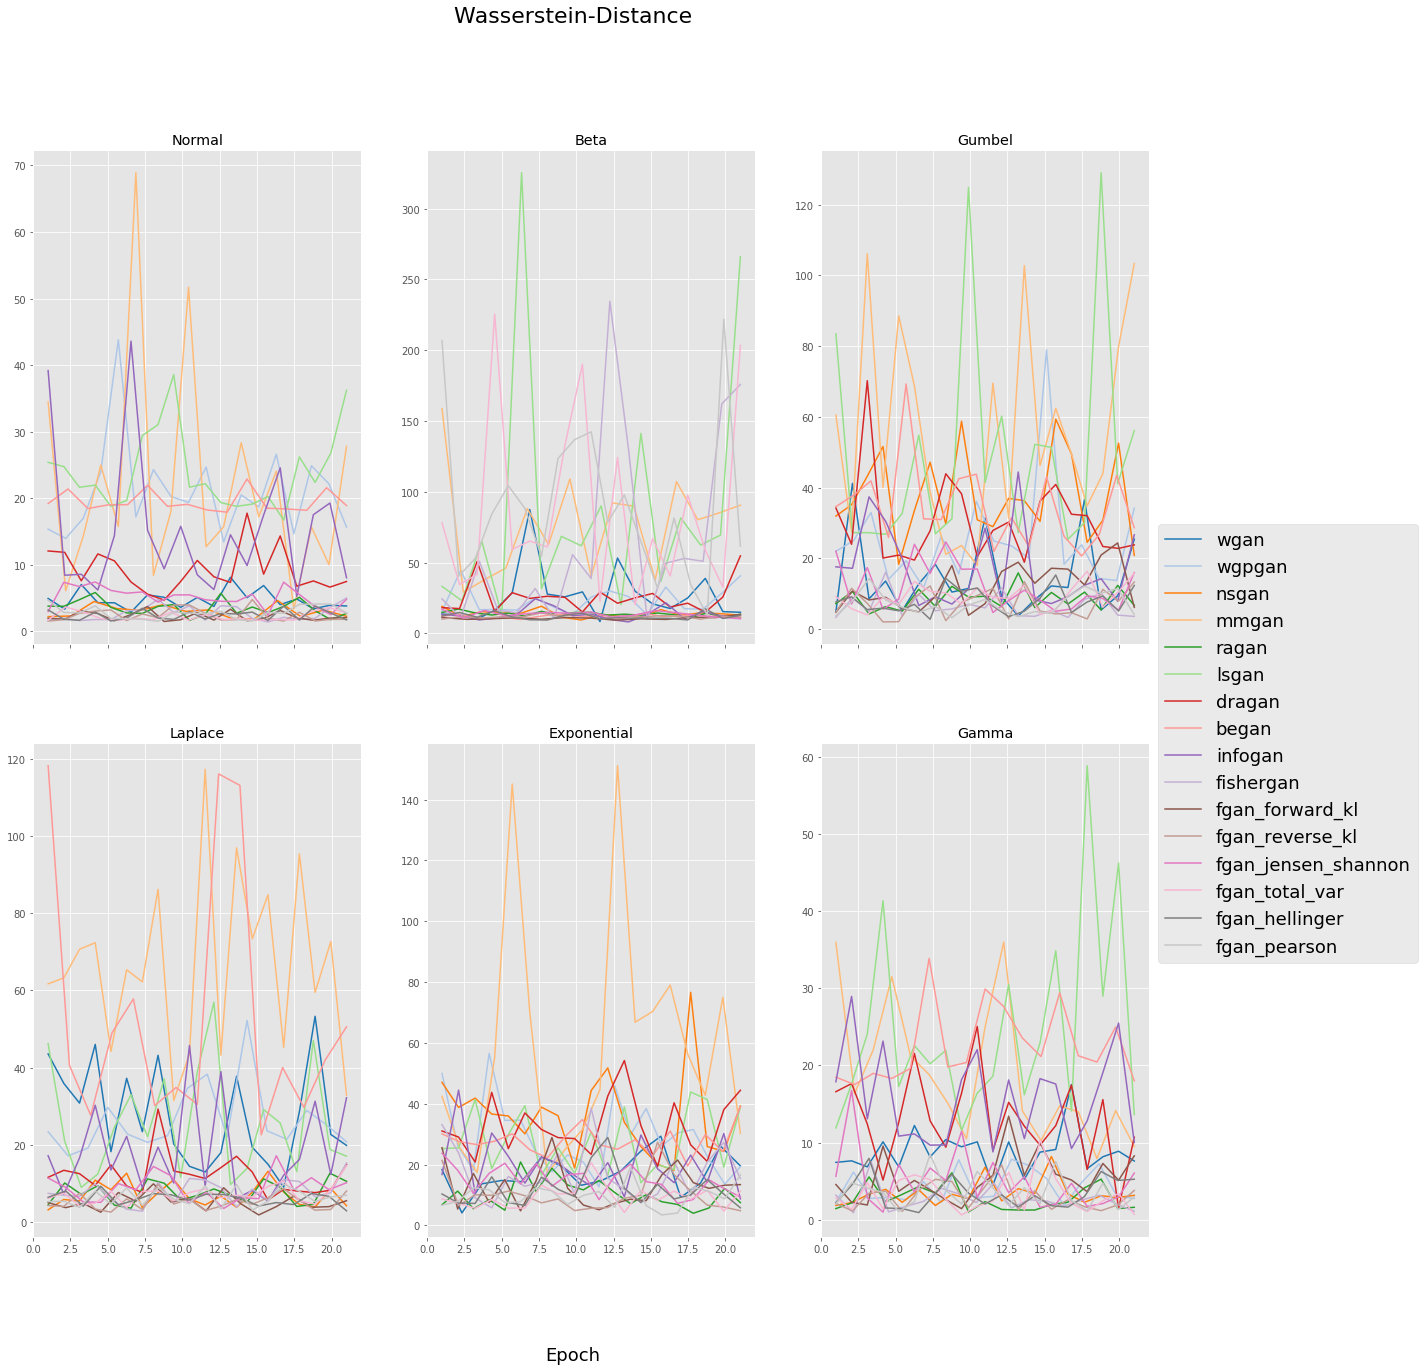

In [24]:
print(""" Plot mean performance across epochs for 10k samples""")
graph_multivariate(optimal_10000, omit_outliers=True, thresh=4.5)

 Plot mean performance across epochs for 100k samples


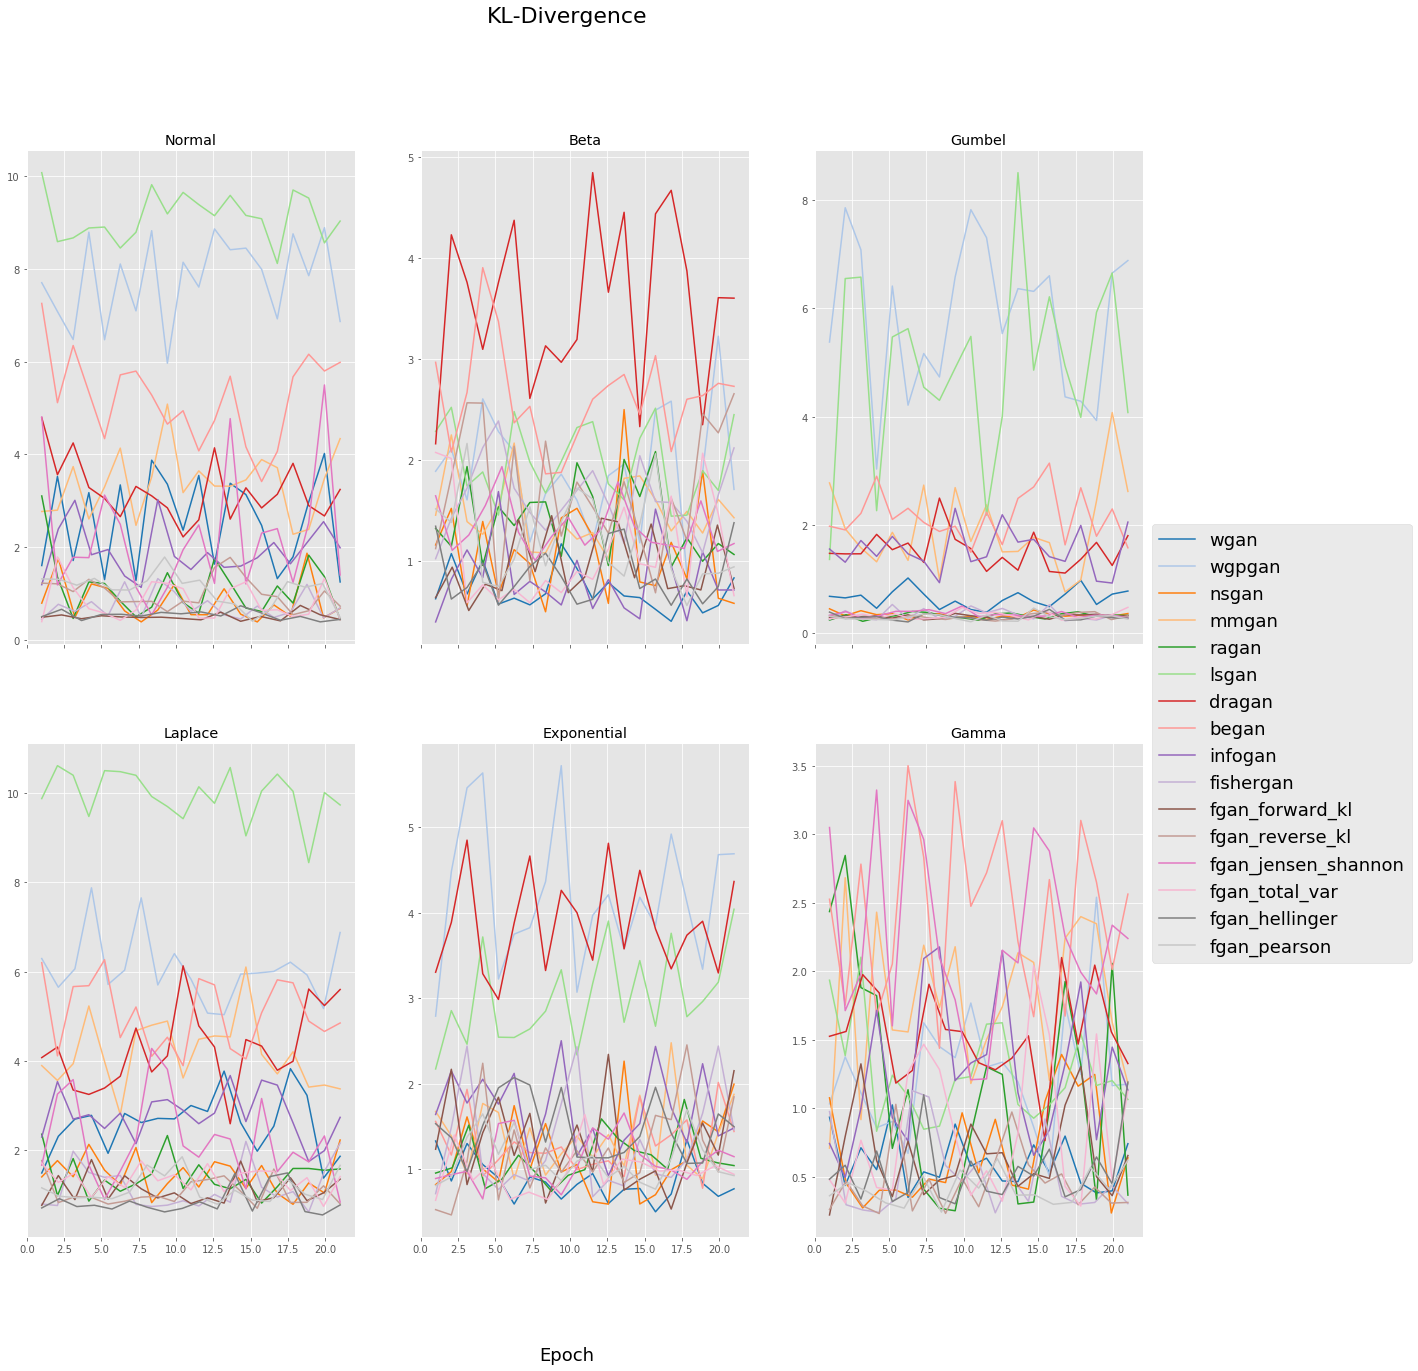

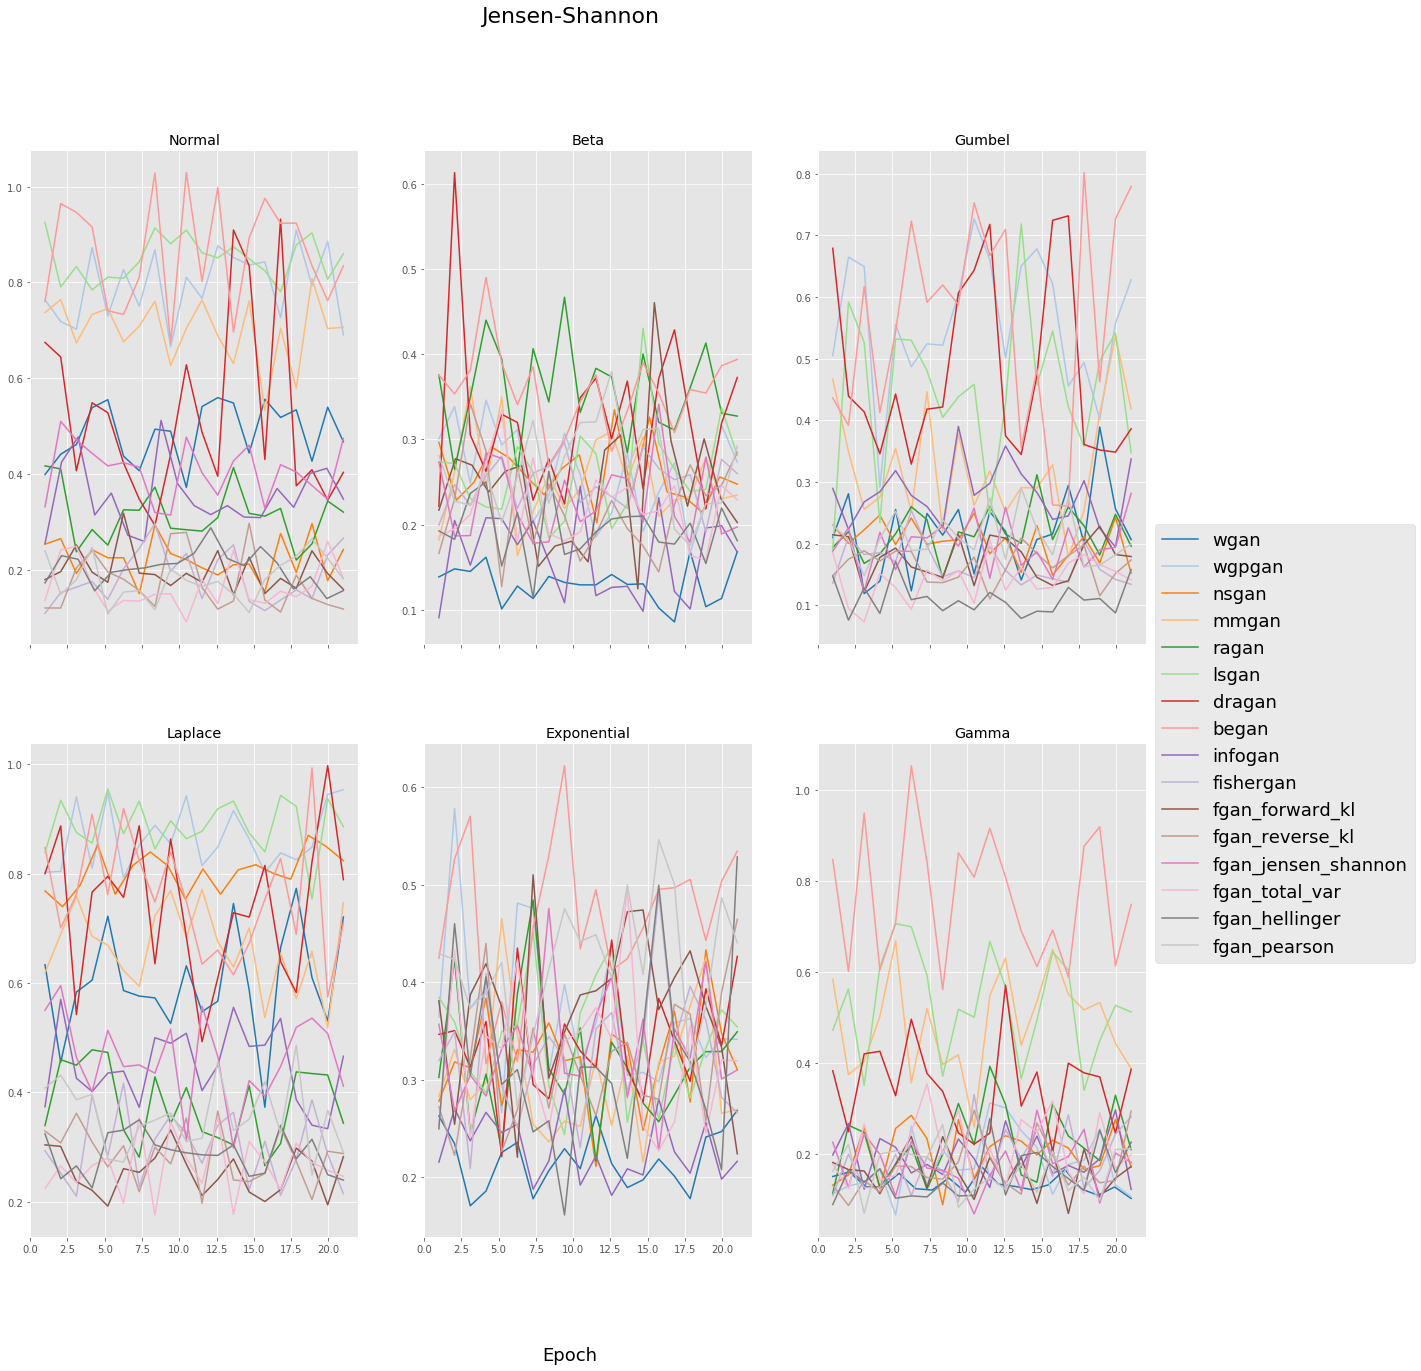

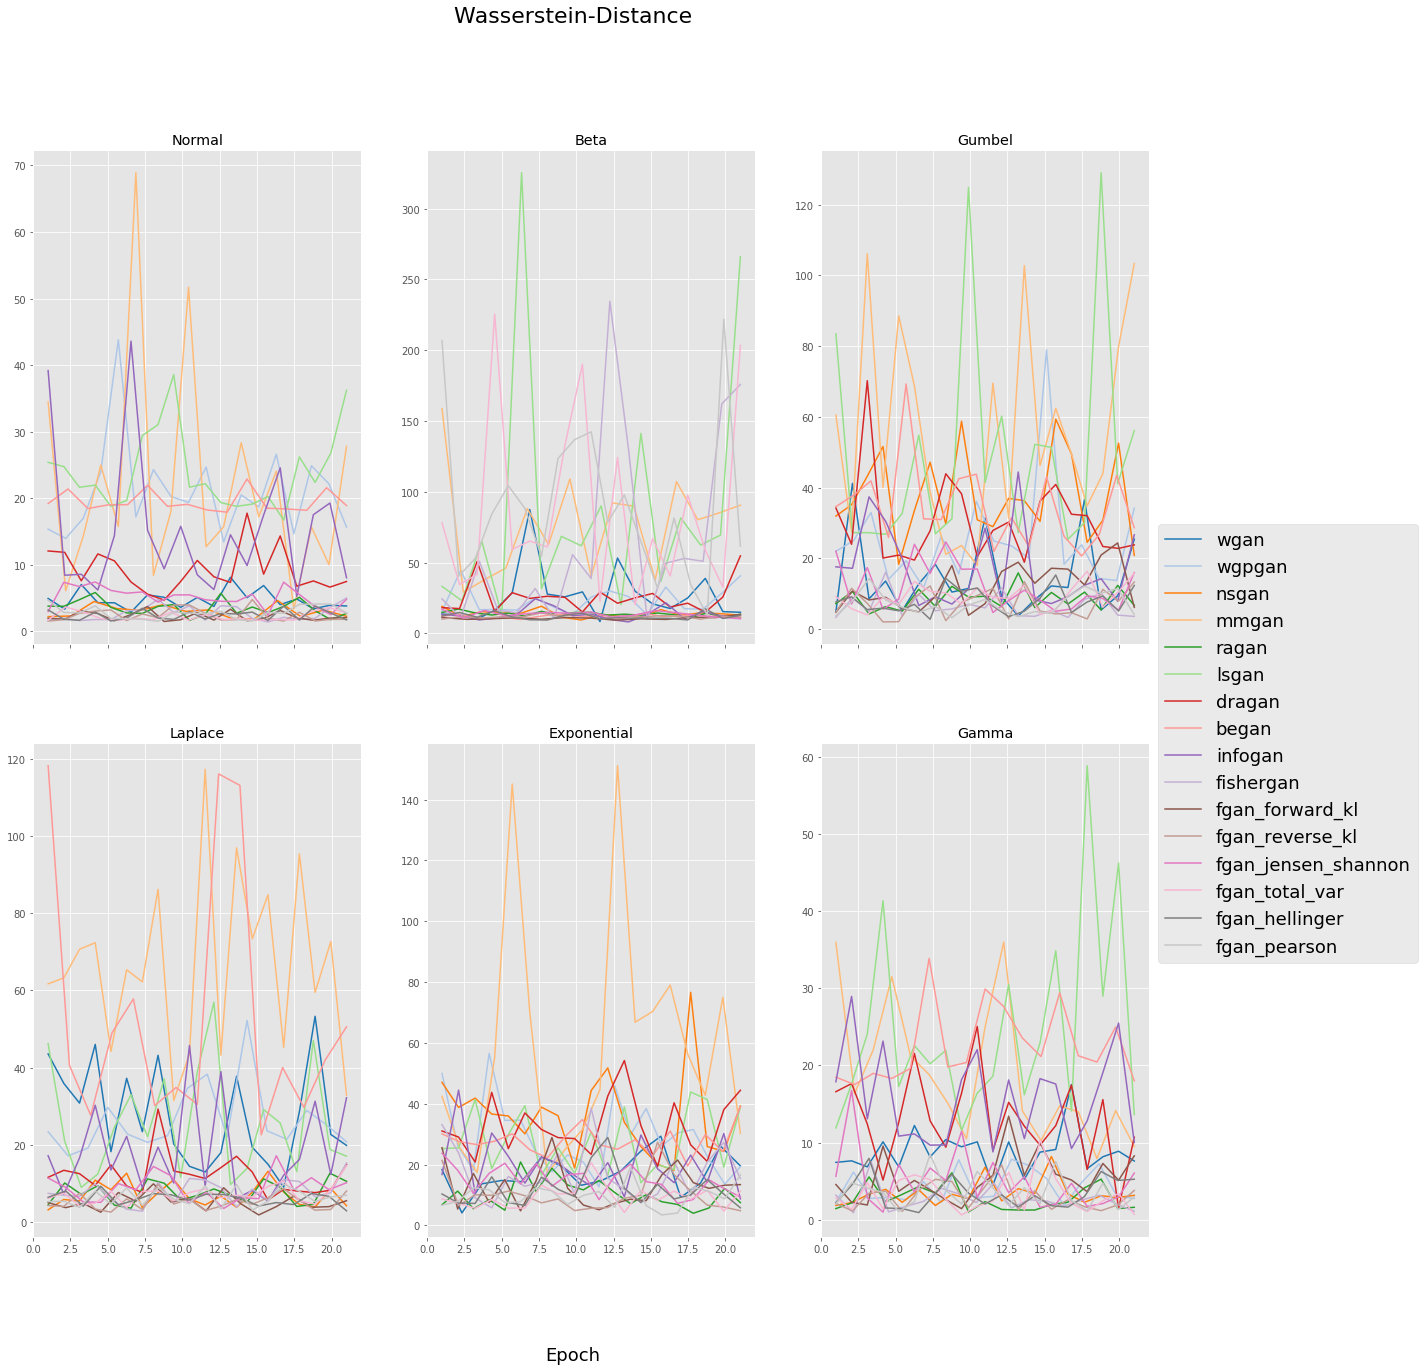

In [25]:
print(""" Plot mean performance across epochs for 100k samples""")
graph_multivariate(optimal_100000, omit_outliers=True, thresh=4.5)

In [32]:
print(""" Print confidence intervals for minimum across all runs """)
rankings_dict = nested_pickle_dict()
param_dict = nested_pickle_dict()

for metric in distance_metrics:
    
    print('\n======================')
    print('{0}'.format(metric))
    print('======================\n')
        
    for samples, optimal in [(1000, optimal_1000), (10000, optimal_10000), (100000, optimal_100000)]:
        
        print('\n{0} Samples \n'.format(samples))

        for distribution in distributions:

            for model_name in model_names:
                
                minimums = np.nanmin(np.array(optimal[model_name][distribution][metric]['values']), axis=1)
                mu, h, low, high = mean_confidence_interval(minimums)
                param_dict[metric][model_name][distribution][samples] = '%.3f ± %.3f' % (np.round(mu, 3), np.round(h, 3))
        
        data = [[key, param_dict[metric][key]['normal'][samples], param_dict[metric][key]['beta'][samples], 
                      param_dict[metric][key]['gumbel'][samples], param_dict[metric][key]['laplace'][samples], 
                      param_dict[metric][key]['exponential'][samples], param_dict[metric][key]['gamma'][samples]]
                 for key in model_names]
        print(tabulate(data, headers=['Model', 'Normal', 'Beta', 'Gumbel', 'Laplace', 'Exponential', 'Gamma'], tablefmt='fancy_grid'), '\n')
        
        rankings = np.argsort([[eval(i[:4]) if i[:4] != 'nan ' else 1e10 for i in j[1:]] for j in data], axis=0)
        
        for j in range(rankings.shape[1]):
            for idx, name in enumerate(rankings[:, j]):
                if model_names[name] not in rankings_dict[metric][distributions[j]]:
                    rankings_dict[metric][distributions[j]][model_names[name]] = []
                rankings_dict[metric][distributions[j]][model_names[name]].append(idx)

 Print confidence intervals for minimum across all runs 

KL-Divergence


1000 Samples 

╒═════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Model               │ Normal        │ Beta          │ Gumbel        │ Laplace       │ Exponential   │ Gamma         │
╞═════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ wgan                │ 0.832 ± 0.295 │ 0.445 ± 0.043 │ 0.251 ± 0.037 │ 1.174 ± 0.249 │ 0.609 ± 0.061 │ 0.312 ± 0.038 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ wgpgan              │ 0.989 ± 0.280 │ 0.985 ± 0.119 │ 1.139 ± 0.303 │ 1.916 ± 0.351 │ 0.955 ± 0.122 │ 0.904 ± 0.144 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ nsgan               │ 0.544 ± 0.238 │ 0.814 ± 0.256 │ 0.177 ± 0.010 │


100000 Samples 

╒═════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Model               │ Normal        │ Beta          │ Gumbel        │ Laplace       │ Exponential   │ Gamma         │
╞═════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ wgan                │ 0.128 ± 0.019 │ 0.099 ± 0.010 │ 0.062 ± 0.007 │ 0.201 ± 0.019 │ 0.156 ± 0.010 │ 0.078 ± 0.011 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ wgpgan              │ 0.129 ± 0.026 │ 0.190 ± 0.020 │ 0.174 ± 0.023 │ 0.259 ± 0.042 │ 0.248 ± 0.019 │ 0.143 ± 0.032 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ nsgan               │ 0.106 ± 0.021 │ 0.161 ± 0.019 │ 0.079 ± 0.009 │ 0.197 ± 0.022 │ 0.213 ± 0.013 │ 0.125 ± 0.025 │
├─────────────────────

In [31]:
print(""" Print confidence intervals for minimum across all runs """)

for metric in distance_metrics:
    
    print('\n======================')
    print('{0}'.format(metric))
    print('======================\n')
                
    for distribution in distributions:
        
        for model_name in model_names:
            
            param_dict[metric][model_name][distribution]['performance'] = ''
        
            for samples, optimal in [(1000, optimal_1000), (10000, optimal_10000), (100000, optimal_100000)]:
                        
                minimums = np.nanmin(np.array(optimal[model_name][distribution][metric]['values']), axis=1)
                mu, h, low, high = mean_confidence_interval(minimums)
                param_dict[metric][model_name][distribution]['performance'] += '%.3f ± %.3f\n' % (np.round(mu, 3), np.round(h, 3))
        
    data = [[key, param_dict[metric][key]['normal']['performance'], param_dict[metric][key]['beta']['performance'], 
                  param_dict[metric][key]['gumbel']['performance'], param_dict[metric][key]['laplace']['performance'], 
                  param_dict[metric][key]['exponential']['performance'], param_dict[metric][key]['gamma']['performance']]
             for key in model_names]
    print(tabulate(data, headers=['Model', 'Normal', 'Beta', 'Gumbel', 'Laplace', 'Exponential', 'Gamma'], tablefmt='fancy_grid'), '\n')

 Print confidence intervals for minimum across all runs 

KL-Divergence

╒═════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Model               │ Normal        │ Beta          │ Gumbel        │ Laplace       │ Exponential   │ Gamma         │
╞═════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ wgan                │ 0.832 ± 0.295 │ 0.445 ± 0.043 │ 0.251 ± 0.037 │ 1.174 ± 0.249 │ 0.609 ± 0.061 │ 0.312 ± 0.038 │
│                     │ 0.832 ± 0.295 │ 0.445 ± 0.043 │ 0.251 ± 0.037 │ 1.174 ± 0.249 │ 0.609 ± 0.061 │ 0.312 ± 0.038 │
│                     │ 0.832 ± 0.295 │ 0.445 ± 0.043 │ 0.251 ± 0.037 │ 1.174 ± 0.249 │ 0.609 ± 0.061 │ 0.312 ± 0.038 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ wgpgan              │ 0.989 ± 0.280 │ 0.985 ± 0.119 │ 1.139 ± 0.303 │ 1.916 ± 0.351 │

╒═════════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╕
│ Model               │ Normal         │ Beta           │ Gumbel         │ Laplace        │ Exponential    │ Gamma          │
╞═════════════════════╪════════════════╪════════════════╪════════════════╪════════════════╪════════════════╪════════════════╡
│ wgan                │ 2.376 ± 0.428  │ 6.301 ± 0.543  │ 5.910 ± 1.368  │ 7.698 ± 2.711  │ 9.615 ± 2.024  │ 3.235 ± 1.053  │
│                     │ 2.376 ± 0.428  │ 6.301 ± 0.543  │ 5.910 ± 1.368  │ 7.698 ± 2.711  │ 9.615 ± 2.024  │ 3.235 ± 1.053  │
│                     │ 2.376 ± 0.428  │ 6.301 ± 0.543  │ 5.910 ± 1.368  │ 7.698 ± 2.711  │ 9.615 ± 2.024  │ 3.235 ± 1.053  │
├─────────────────────┼────────────────┼────────────────┼────────────────┼────────────────┼────────────────┼────────────────┤
│ wgpgan              │ 3.191 ± 0.400  │ 8.336 ± 0.654  │ 7.611 ± 2.508  │ 8.480 ± 3.452  │ 11.127 ± 2.078 │ 4.279 ± 1

In [34]:
print(""" Get relative ranking performance based on mean minimum performance\n """)


print('0 is the best performance.\n1st entry: 1k samples, 2nd: 10k, 3rd: 100k \n')
for metric in distance_metrics:
    print('========{0}=======\n'.format(metric))
    
    print(tabulate([[key, rankings_dict[metric]['normal'][key], rankings_dict[metric]['beta'][key], rankings_dict[metric]['gumbel'][key],
                          rankings_dict[metric]['laplace'][key], rankings_dict[metric]['exponential'][key], rankings_dict[metric]['gamma'][key]] 
                    for key in model_names], 
                   headers=['Model', 'Normal', 'Beta', 'Gumbel', 'Laplace', 'Exponential', 'Gamma']), '\n')

 Get relative ranking performance based on mean minimum performance
 
0 is the best performance.
1st entry: 1k samples, 2nd: 10k, 3rd: 100k 

========KL-Divergence=======

Model                Normal        Beta          Gumbel        Laplace       Exponential    Gamma
-------------------  ------------  ------------  ------------  ------------  -------------  ------------
wgan                 [3, 3, 6]     [0, 1, 0]     [6, 6, 5]     [6, 6, 5]     [0, 0, 0]      [0, 0, 0]
wgpgan               [11, 11, 10]  [5, 2, 1]     [12, 9, 8]    [12, 10, 9]   [10, 5, 1]     [7, 1, 1]
nsgan                [4, 4, 4]     [8, 6, 4]     [4, 3, 3]     [4, 3, 4]     [4, 10, 5]     [2, 4, 3]
mmgan                [14, 13, 15]  [14, 11, 12]  [13, 12, 9]   [13, 13, 15]  [15, 11, 2]    [15, 14, 12]
ragan                [9, 9, 11]    [11, 14, 14]  [8, 8, 14]    [10, 9, 11]   [5, 13, 11]    [9, 10, 13]
lsgan                [12, 12, 13]  [12, 7, 6]    [10, 11, 10]  [7, 12, 14]   [11, 14, 3]    [10, 13, 4]
dragan

 Plot mean minimum performance with error bars as a function of number samples 


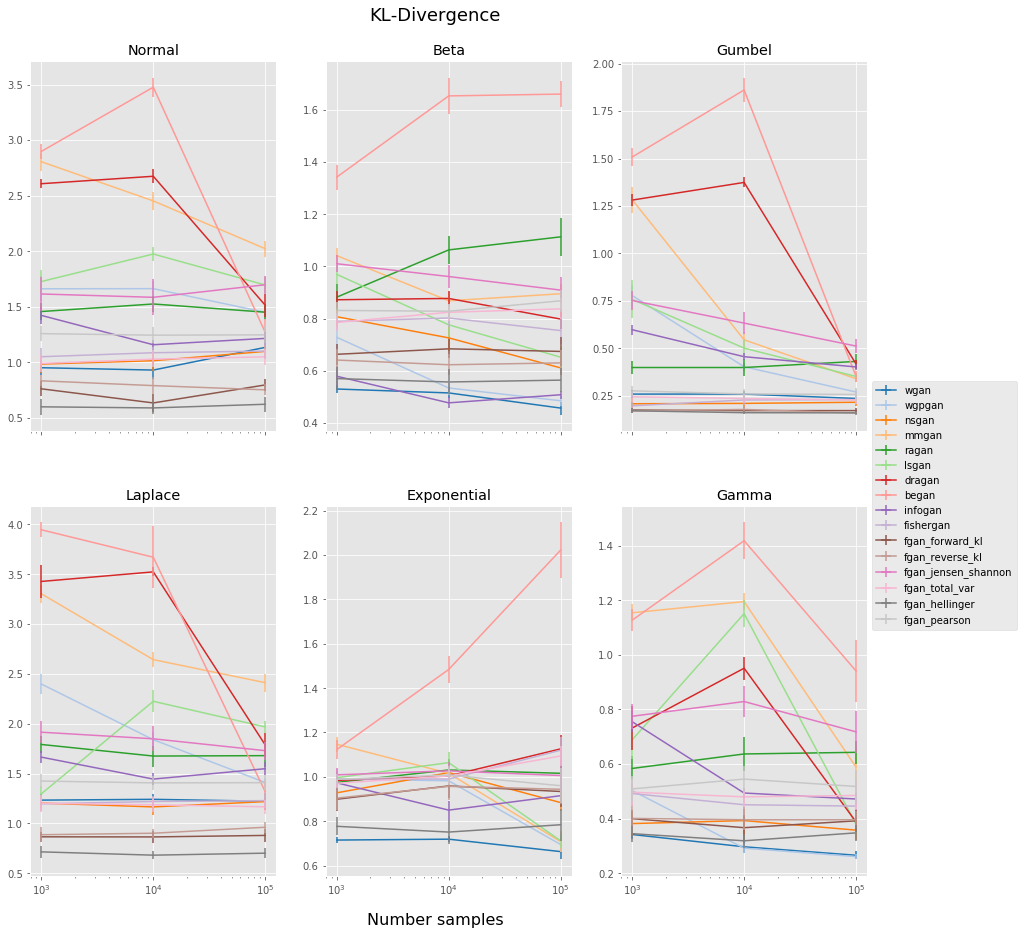

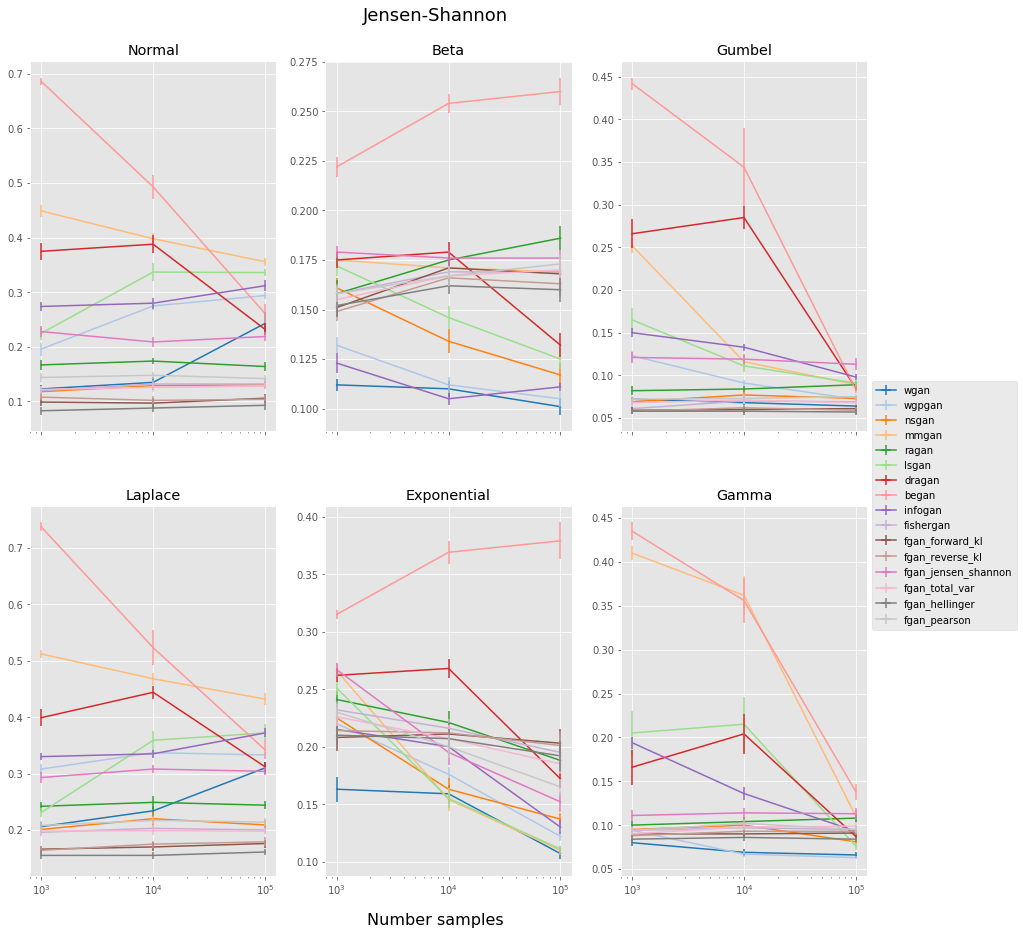

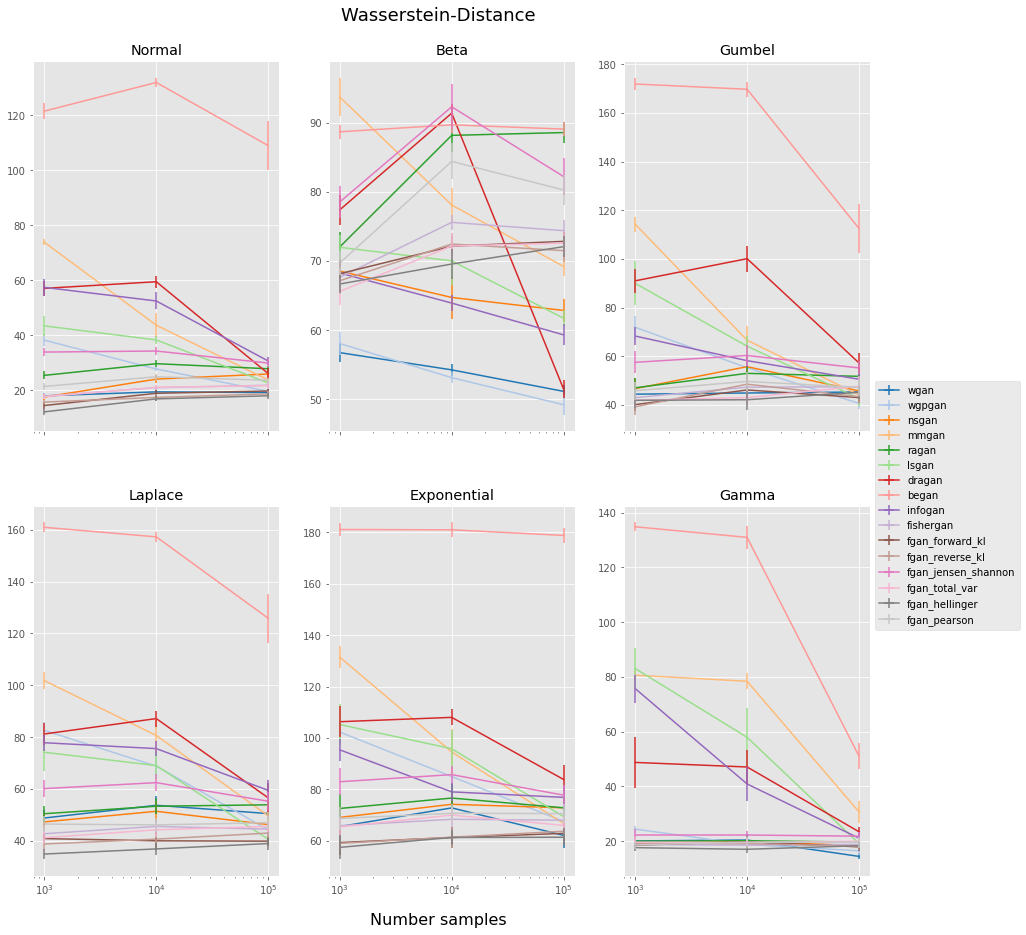

In [55]:
print(""" Plot mean minimum performance with error bars as a function of number samples """)

for metric in distance_metrics:
    
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(15,15))
                
    for d_idx, distribution in enumerate(distributions):

        for idx, model_name in enumerate(model_names):

            x, y, yerr = [], [], []
            for key, val in param_dict[metric][model_name][distribution].items():
                if key == 'performance':
                    continue

                mu, err = val.split('±')
                x.append(float(key)), y.append(float(mu)), yerr.append(float(err))

            axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].errorbar(x, y, xerr=0, yerr=yerr,
                                                                  barsabove=True, label=model_name,
                                                                  c=palette[idx], ecolor=palette[idx])
            axes[plt_idx[d_idx][0], plt_idx[d_idx][1]].set_title("{0}".format(distribution.capitalize()))

    plt.xscale('log')
    fig.suptitle("{0}".format(metric), x=0.5, y=0.93, fontsize=18)
    fig.text(0.5, 0.08, "Number samples", ha='center', fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1, 1))
    plt.savefig('../graphs/multivariate/samplesfnc_{0}_{1}_.png'.format(metric, 128), dpi=100)
    plt.show()
    print('\n')

In [13]:
print(""" Get number of different hyperparameters for each minimum run """)
print('1st entry: 1k samples, 2nd: 10k, 3rd: 100k')

for metric in distance_metrics:
    
    print('\n======================')
    print('{0}'.format(metric))
    print('======================\n')
    
    param_dict = nested_pickle_dict()
        
    for samples, optimal in [(1000, optimal_1000), (10000, optimal_10000), (100000, optimal_100000)]:
        
        for distribution in distributions:
            
            for model_name in model_names:
                if distribution not in param_dict[model_name]:
                    param_dict[model_name][distribution] = []
                param_dict[model_name][distribution].append(len(set([tuple(t) for t in optimal[model_name][distribution][metric]['parameters']])))

    print(tabulate([[key, param_dict[key]['normal'], param_dict[key]['beta'], param_dict[key]['gumbel'],
                          param_dict[key]['laplace'], param_dict[key]['exponential'], param_dict[key]['gamma']]
                     for key in model_names],
                    headers=['Model', 'Normal', 'Beta', 'Gumbel', 'Laplace', 'Exponential', 'Gamma']))

 Get number of different hyperparameters for each minimum run 
1st entry: 1k samples, 2nd: 10k, 3rd: 100k

KL-Divergence

Model                Normal        Beta         Gumbel      Laplace       Exponential    Gamma
-------------------  ------------  -----------  ----------  ------------  -------------  ------------
wgan                 [14, 12, 10]  [5, 3, 4]    [5, 10, 5]  [14, 9, 9]    [10, 9, 10]    [11, 9, 7]
wgpgan               [5, 7, 7]     [3, 3, 3]    [6, 5, 2]   [4, 5, 4]     [8, 8, 10]     [11, 5, 6]
nsgan                [9, 7, 8]     [9, 4, 4]    [5, 8, 7]   [8, 5, 6]     [9, 10, 12]    [11, 8, 12]
mmgan                [8, 6, 4]     [3, 4, 5]    [6, 4, 5]   [7, 4, 2]     [5, 7, 10]     [5, 3, 7]
ragan                [11, 12, 10]  [6, 9, 10]   [9, 9, 13]  [13, 13, 11]  [8, 4, 4]      [12, 9, 11]
lsgan                [5, 4, 3]     [5, 7, 6]    [3, 4, 5]   [2, 7, 4]     [8, 7, 7]      [4, 6, 8]
dragan               [8, 6, 9]     [6, 4, 9]    [5, 4, 6]   [11, 6, 8]    [7, 4, 